# Question 2


Write a Matlab/Python function [cc] = Conncomp(I, connectivity, V ) to find all the connected components in
an Image using Sequential algorithm. The parameter connectivity may be either 4 or 8, while the parameter V
contains the set of intensity values to define connectivity. Compare your results with Matlab/Python’s inbuilt
function bwconncomp.

# Python Code


### TEST IMAGE 1


In [ ]:
import numpy as np
import cv2
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import sys


In [ ]:

# set the recursion limit to a larger number
sys.setrecursionlimit(10**6)

def Conncomp(I, connectivity, V):
    rows, cols = I.shape
    visited = np.zeros((rows, cols))
    cc = []
    if connectivity == 4:
        dr = [0, -1, 0, 1]
        dc = [-1, 0, 1, 0]
    else:
        dr = [-1, -1, -1, 0, 0, 1, 1, 1]
        dc = [-1, 0, 1, -1, 1, -1, 0, 1]

    def is_valid(row, col):
        if row >= 0 and row < rows and col >= 0 and col < cols:
            if visited[row][col] == 0 and I[row][col] in V:
                return True
        return False

    def dfs(row, col, component):
        stack = [(row, col)]
        while stack:
            row, col = stack.pop()
            if visited[row][col] == 0 and I[row][col] in V:
                visited[row][col] = 1
                component.append((row, col))
                for i in range(len(dr)):
                    r = row + dr[i]
                    c = col + dc[i]
                    if is_valid(r, c):
                        stack.append((r, c))

    for i in range(rows):
        for j in range(cols):
            if visited[i][j] == 0 and I[i][j] in V:
                component = []
                dfs(i, j, component)
                cc.append(component)

    return cc


In [ ]:

# read the image
img = cv2.imread("connected_com_test1.png", cv2.IMREAD_GRAYSCALE)

# convert the image to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# define the set of intensity values to define connectivity
V = [255]

# find the connected components using our function
cc = Conncomp(binary, 8, V)

# find the connected components using bwconncomp
labels = label(binary, connectivity=2, background=0)


Number of connected components using our function:  10
Number of connected components using bwconncomp:  10


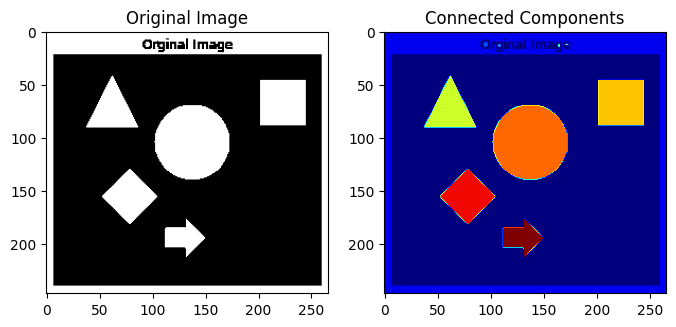

In [ ]:

# compare the number of connected components
print("Number of connected components using our function: ", len(cc))
print("Number of connected components using bwconncomp: ", labels.max())

# visualize the connected components
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(binary, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(labels, cmap='jet')
axs[1].set_title('Connected Components')
plt.show()


As the original image contains text "Original Image" so while processing  it also get counted

## Showing all the components


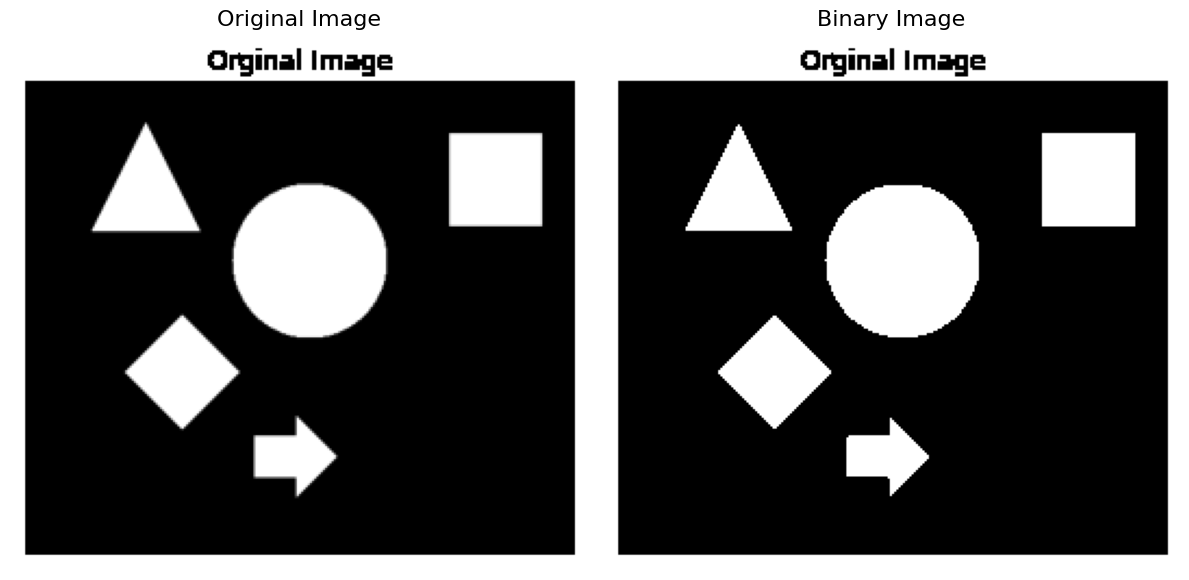

Number of connected components using our function:  10
Number of connected components using bwconncomp:  10


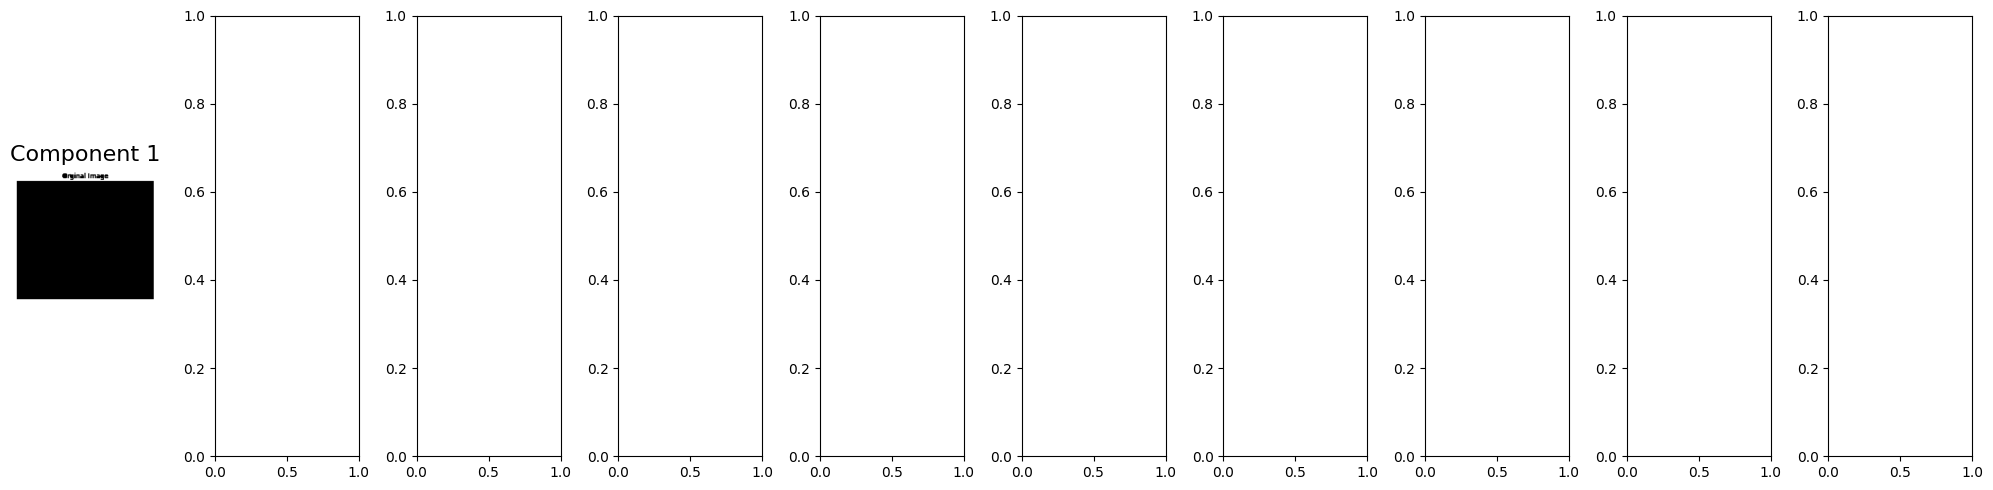

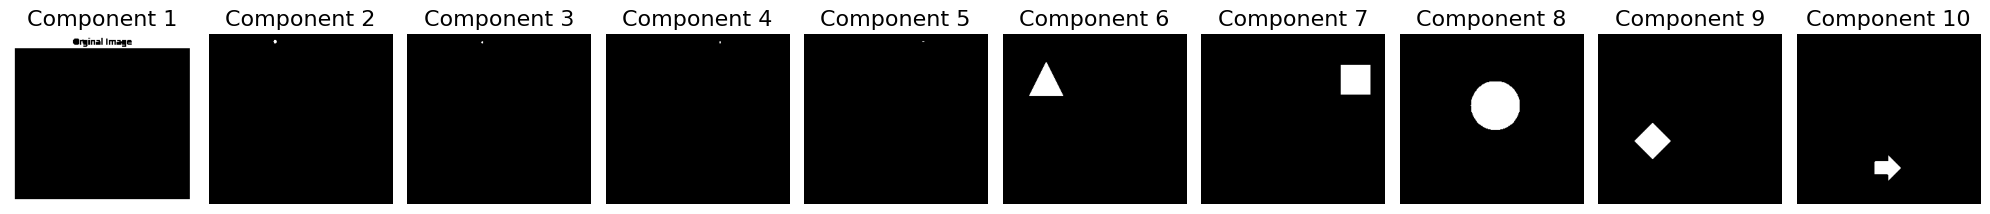

<Figure size 640x480 with 0 Axes>

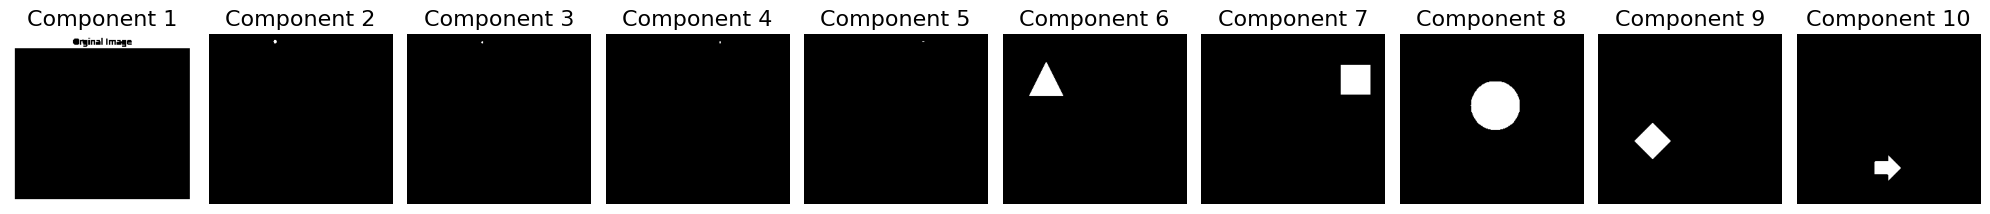

<Figure size 640x480 with 0 Axes>

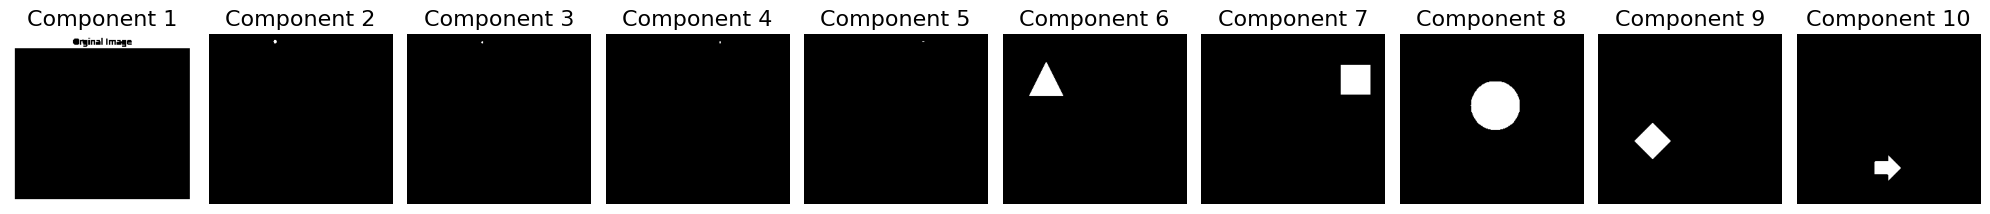

<Figure size 640x480 with 0 Axes>

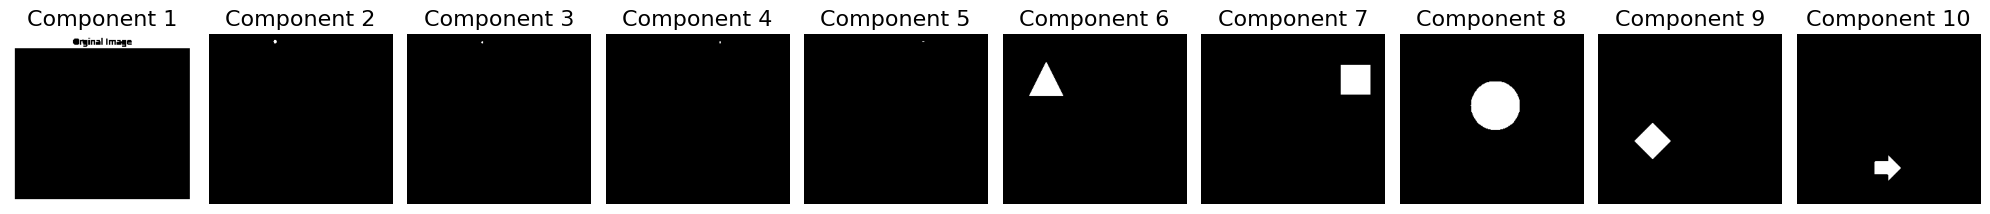

<Figure size 640x480 with 0 Axes>

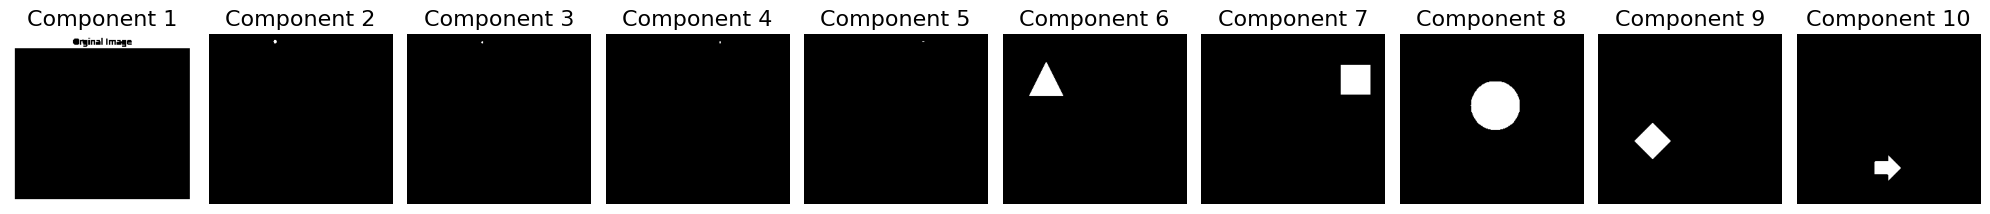

<Figure size 640x480 with 0 Axes>

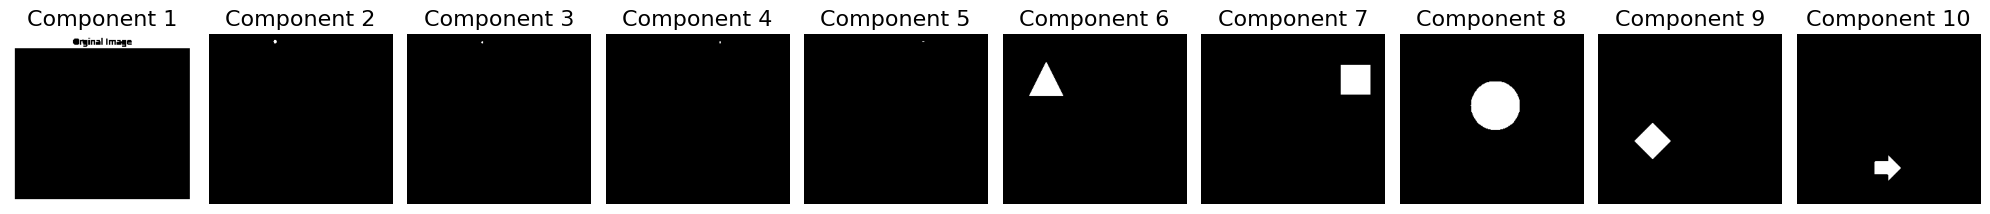

<Figure size 640x480 with 0 Axes>

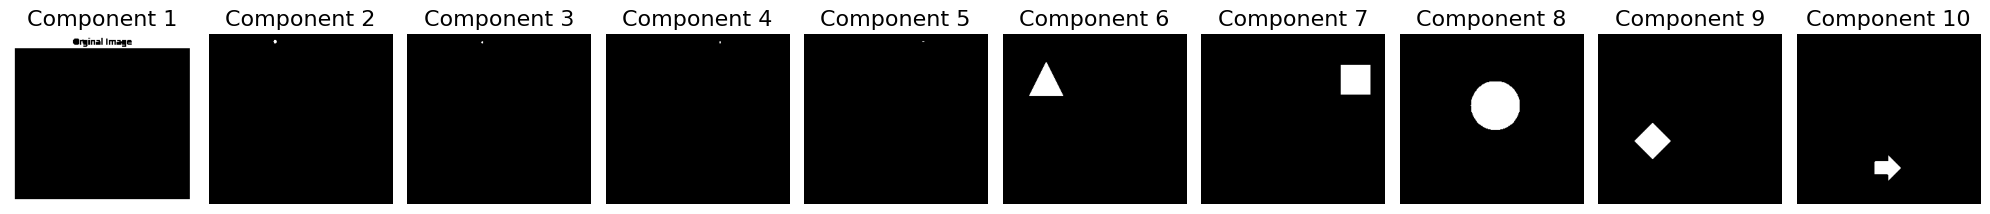

<Figure size 640x480 with 0 Axes>

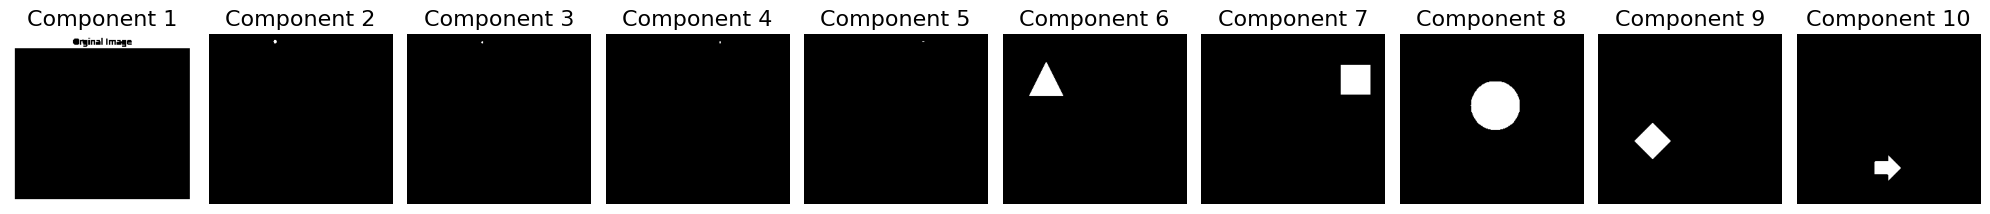

<Figure size 640x480 with 0 Axes>

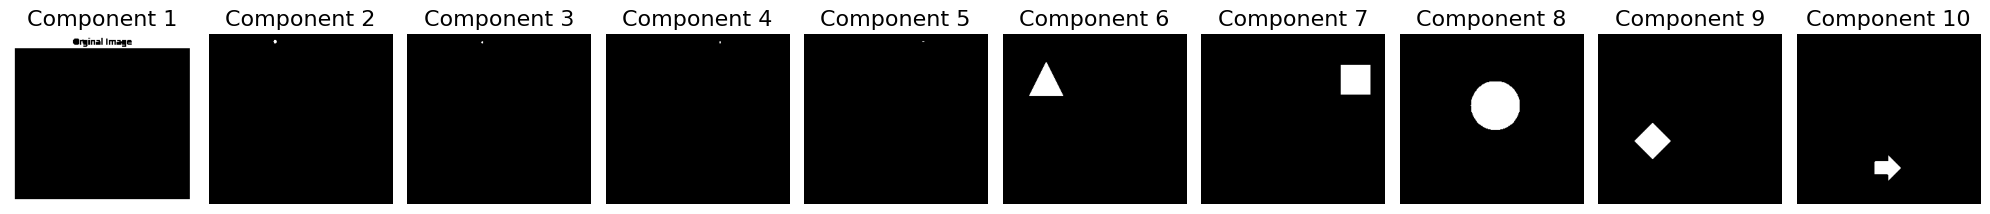

<Figure size 640x480 with 0 Axes>

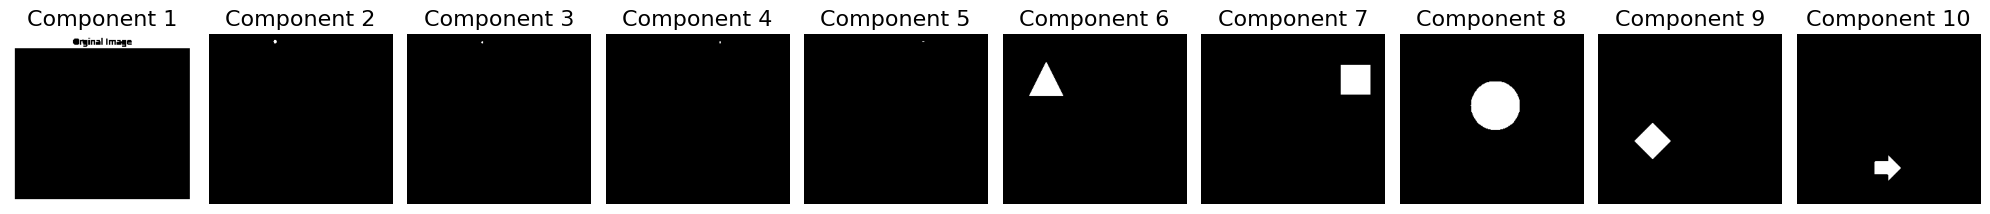

In [ ]:
import numpy as np
import cv2
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import sys

# set the recursion limit to a larger number
sys.setrecursionlimit(10**6)

def Conncomp(I, connectivity, V):
    rows, cols = I.shape
    visited = np.zeros((rows, cols))
    cc = []
    if connectivity == 4:
        dr = [0, -1, 0, 1]
        dc = [-1, 0, 1, 0]
    else:
        dr = [-1, -1, -1, 0, 0, 1, 1, 1]
        dc = [-1, 0, 1, -1, 1, -1, 0, 1]

    def is_valid(row, col):
        if row >= 0 and row < rows and col >= 0 and col < cols:
            if visited[row][col] == 0 and I[row][col] in V:
                return True
        return False

    def dfs(row, col, component):
        stack = [(row, col)]
        while stack:
            row, col = stack.pop()
            if visited[row][col] == 0 and I[row][col] in V:
                visited[row][col] = 1
                component.append((row, col))
                for i in range(len(dr)):
                    r = row + dr[i]
                    c = col + dc[i]
                    if is_valid(r, c):
                        stack.append((r, c))

    for i in range(rows):
        for j in range(cols):
            if visited[i][j] == 0 and I[i][j] in V:
                component = []
                dfs(i, j, component)
                cc.append(component)

    return cc

# read the image
img = cv2.imread("connected_com_test1.png", cv2.IMREAD_GRAYSCALE)

# convert the image to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# define the set of intensity values to define connectivity
V = [255]

# show the original image and the binary image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image', fontsize=16)
axs[0].axis('off')
axs[1].imshow(binary, cmap='gray')
axs[1].set_title('Binary Image', fontsize=16)
axs[1].axis('off')
plt.tight_layout()
plt.show()

# find the connected components using our function
cc = Conncomp(binary, 8, V)

# find the connected components using bwconncomp
labels = label(binary, connectivity=2, background=0)

# compare the number of connected components
print("Number of connected components using our function: ", len(cc))
print("Number of connected components using bwconncomp: ", labels.max())

# visualize each connected component using our function
fig, axs = plt.subplots(1, len(cc), figsize=(20, 5))

for i, component in enumerate(cc):
    # create an empty image with the same shape as the original image
    img = np.zeros_like(binary)
    # set the pixels in the connected component to white
    for r, c in component:
        img[r, c] = 255
            # plot the connected component
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Component {i+1}', fontsize=16)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

    # visualize each connected component using bwconncomp
    regions = regionprops(labels)

    fig, axs = plt.subplots(1, len(regions), figsize=(20, 5))

    for i, region in enumerate(regions):
        # create an empty image with the same shape as the original image
        img = np.zeros_like(binary)
        # set the pixels in the connected component to white
        for r, c in region.coords:
            img[r, c] = 255

        # plot the connected component
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Component {i+1}', fontsize=16)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()



## TEST IMAGE 2


In [ ]:

# read the image
img = cv2.imread("connected_com_test2.png", cv2.IMREAD_GRAYSCALE)

# convert the image to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# define the set of intensity values to define connectivity
V = [255]

# find the connected components using our function
cc = Conncomp(binary, 8, V)

# find the connected components using bwconncomp
labels = label(binary, connectivity=2, background=0)


Number of connected components using our function:  12
Number of connected components using bwconncomp:  12


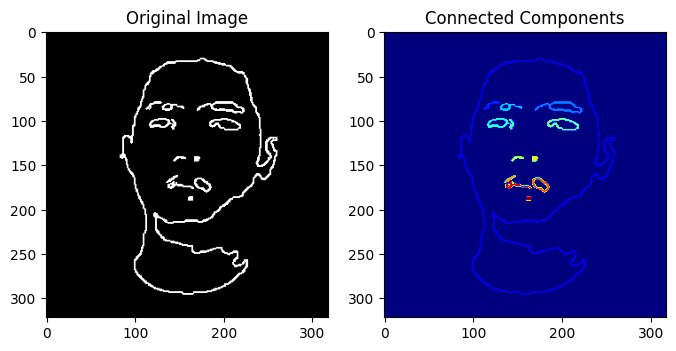

In [ ]:

# compare the number of connected components
print("Number of connected components using our function: ", len(cc))
print("Number of connected components using bwconncomp: ", labels.max())

# visualize the connected components
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(binary, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(labels, cmap='jet')
axs[1].set_title('Connected Components')
plt.show()


## Showing all the components


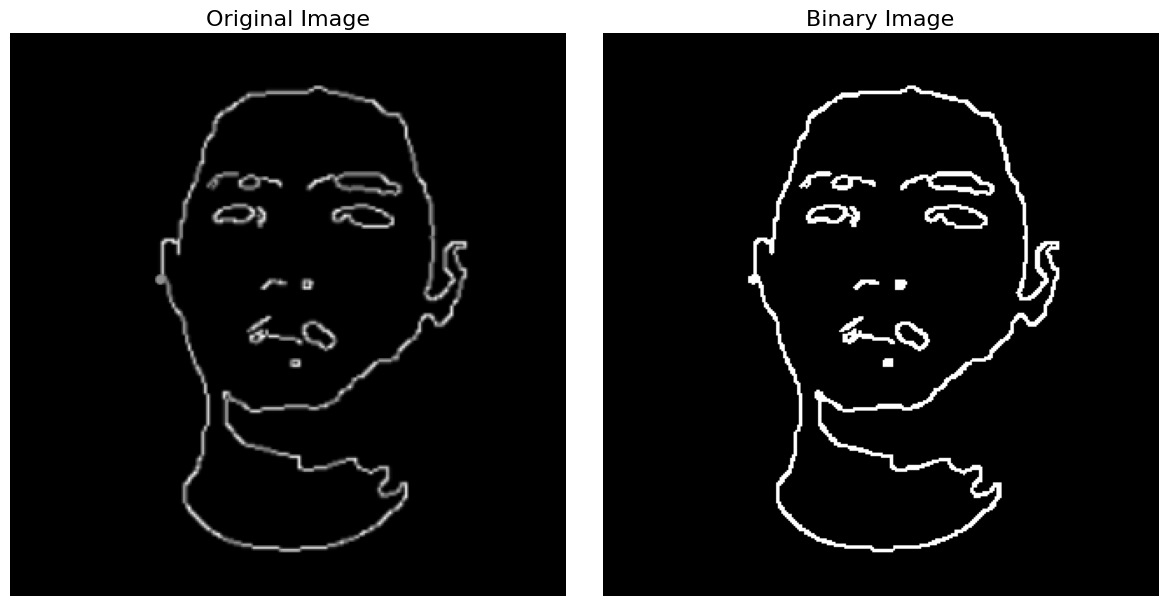

Number of connected components using our function:  12
Number of connected components using bwconncomp:  12


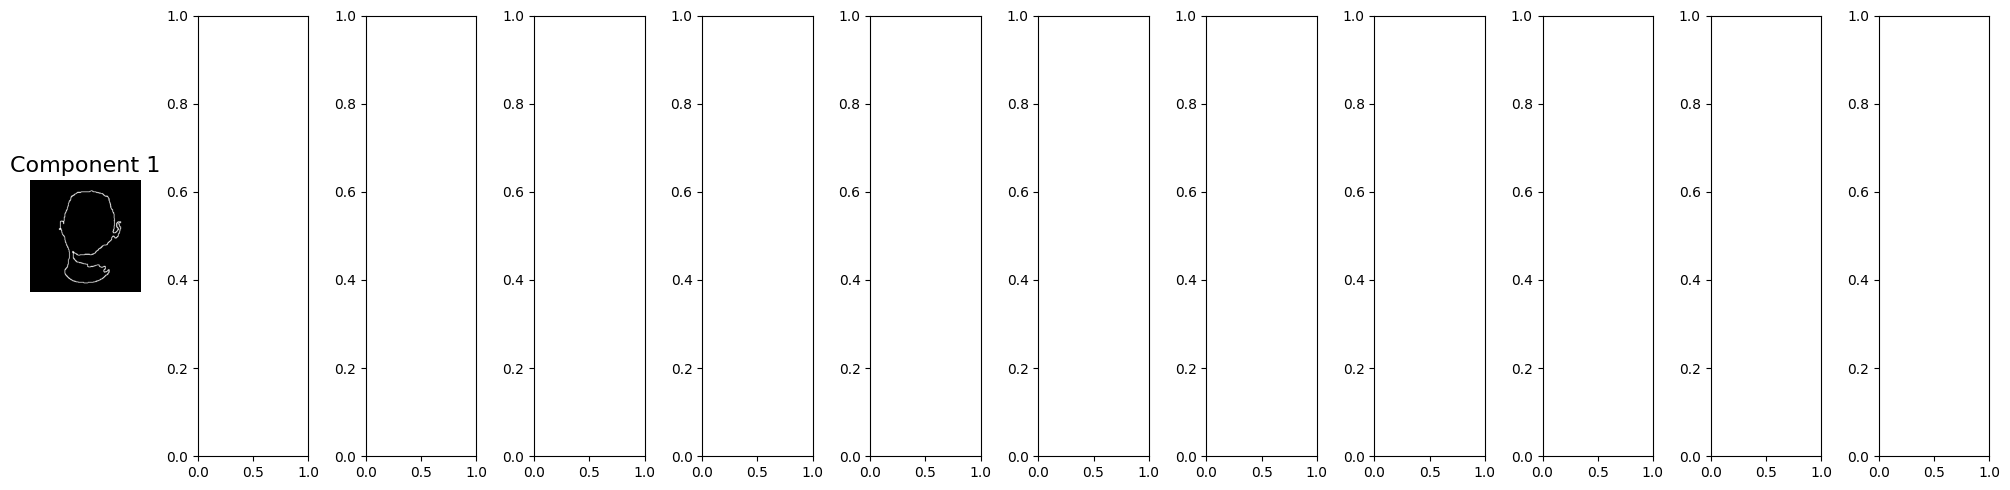

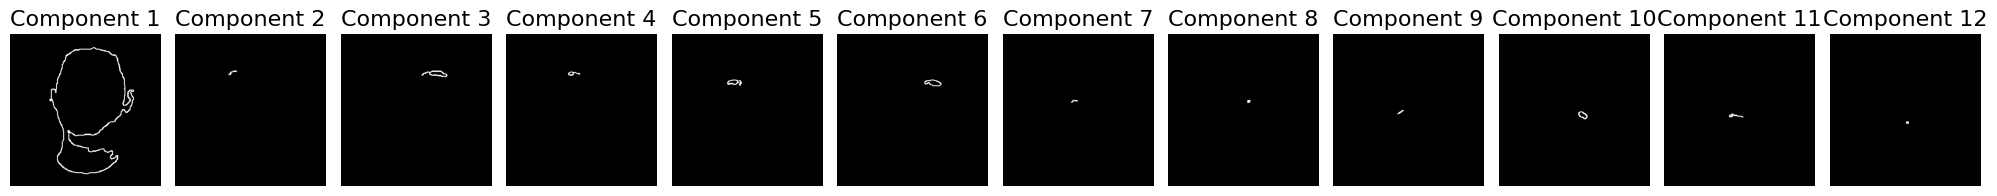

<Figure size 640x480 with 0 Axes>

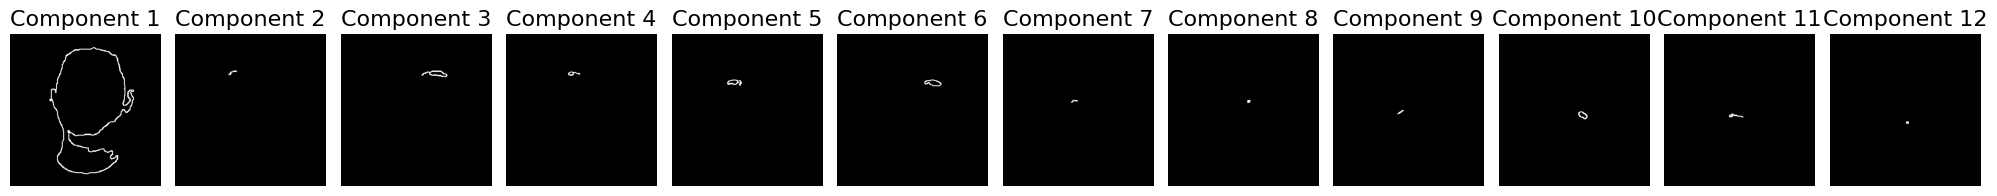

<Figure size 640x480 with 0 Axes>

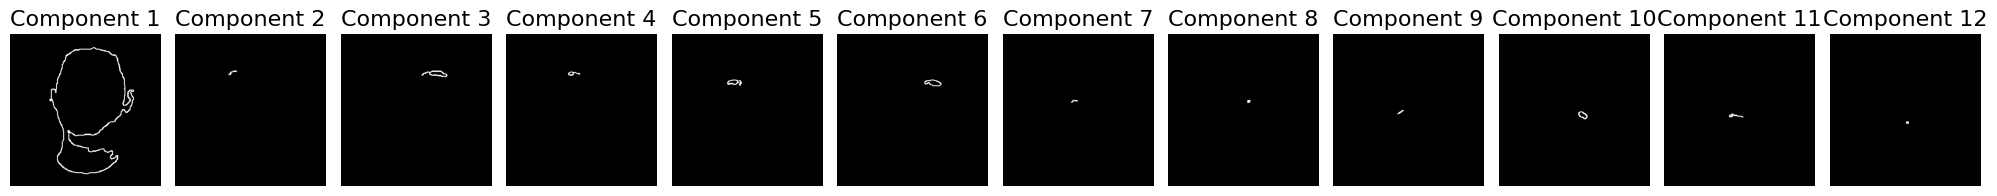

<Figure size 640x480 with 0 Axes>

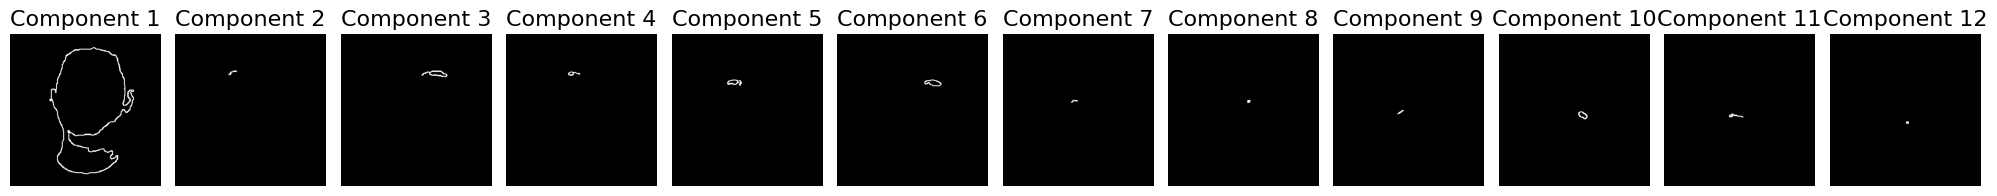

<Figure size 640x480 with 0 Axes>

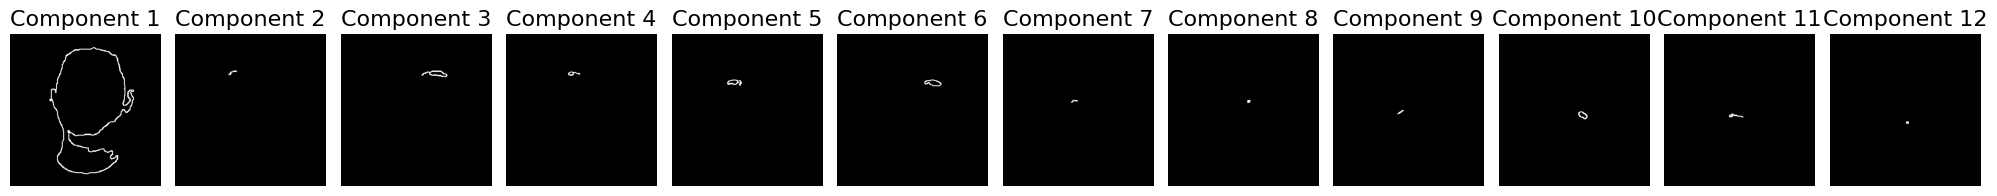

<Figure size 640x480 with 0 Axes>

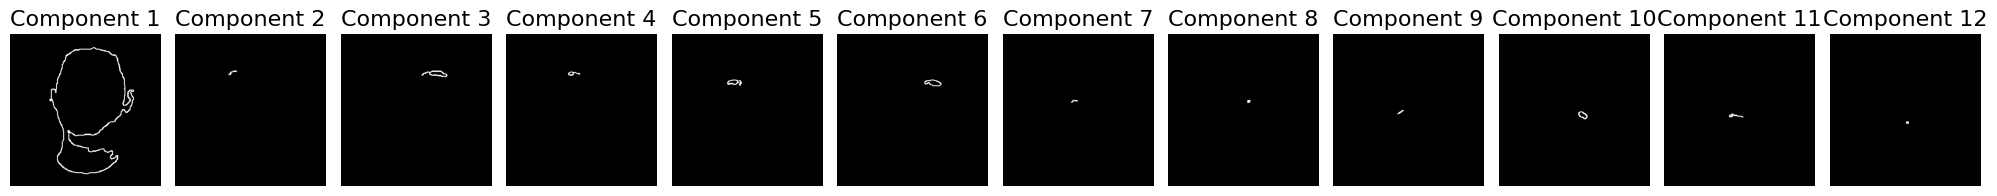

<Figure size 640x480 with 0 Axes>

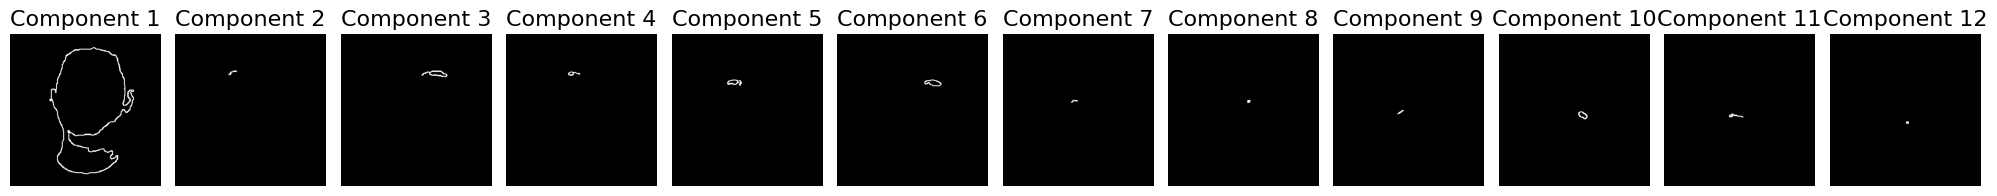

<Figure size 640x480 with 0 Axes>

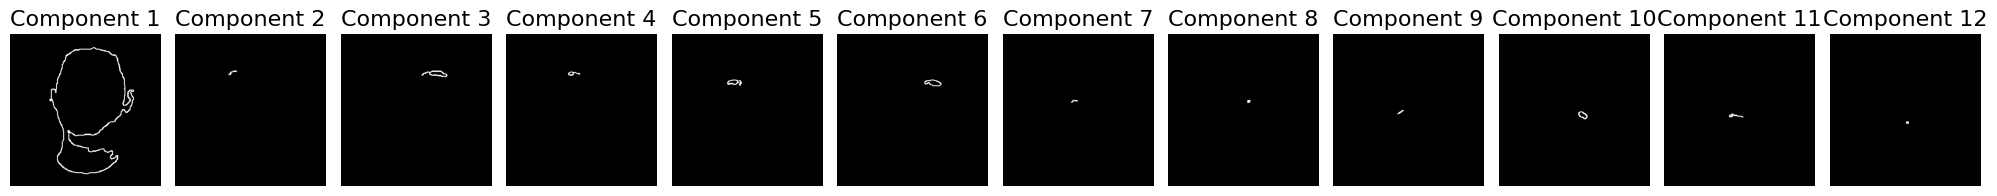

<Figure size 640x480 with 0 Axes>

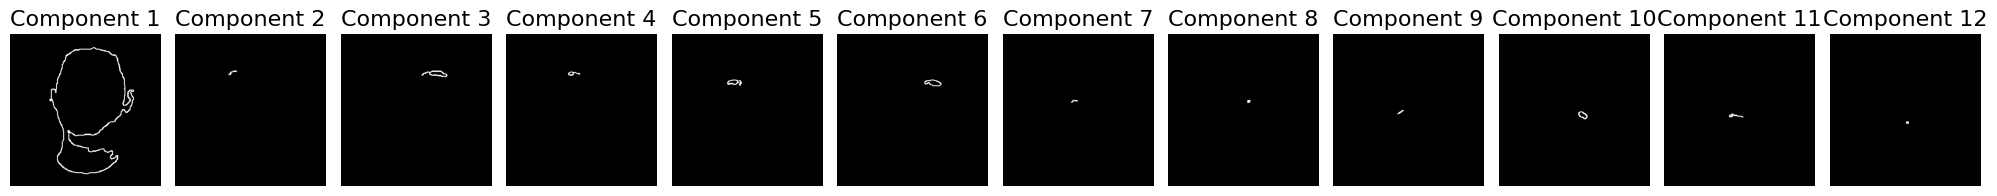

<Figure size 640x480 with 0 Axes>

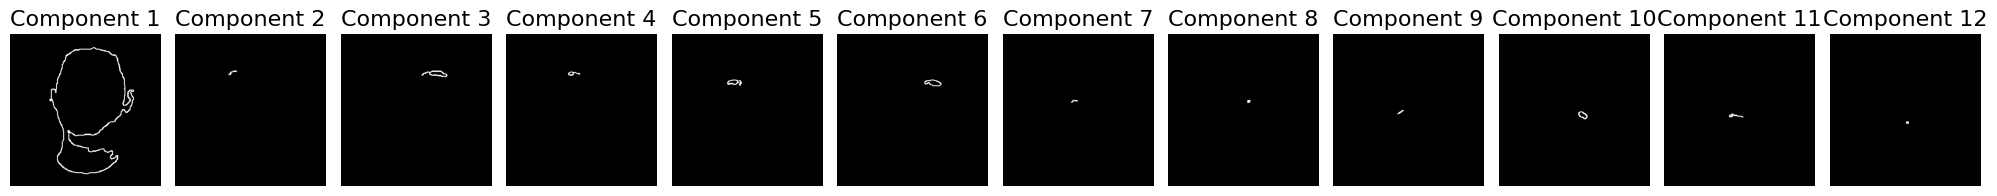

<Figure size 640x480 with 0 Axes>

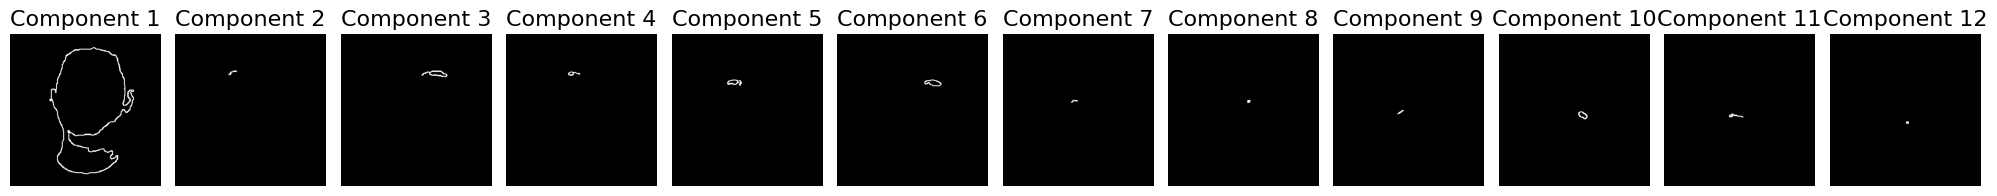

<Figure size 640x480 with 0 Axes>

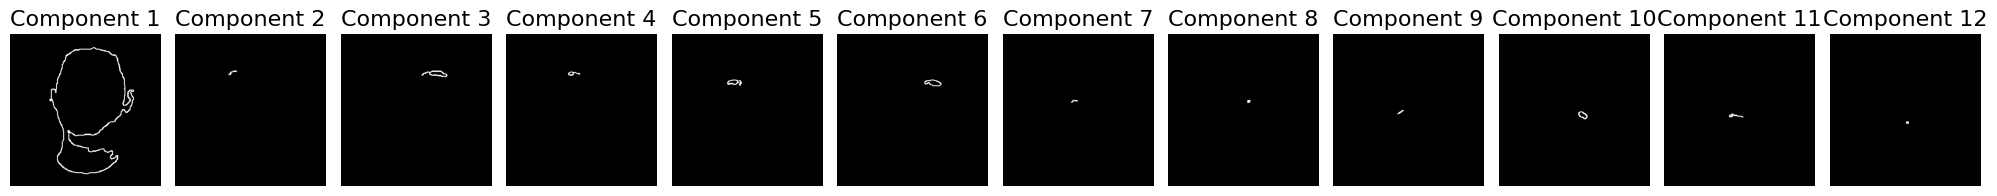

In [ ]:

img = cv2.imread("connected_com_test2.png", cv2.IMREAD_GRAYSCALE)

# convert the image to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# define the set of intensity values to define connectivity
V = [255]

# show the original image and the binary image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image', fontsize=16)
axs[0].axis('off')
axs[1].imshow(binary, cmap='gray')
axs[1].set_title('Binary Image', fontsize=16)
axs[1].axis('off')
plt.tight_layout()
plt.show()

# find the connected components using our function
cc = Conncomp(binary, 8, V)

# find the connected components using bwconncomp
labels = label(binary, connectivity=2, background=0)

# compare the number of connected components
print("Number of connected components using our function: ", len(cc))
print("Number of connected components using bwconncomp: ", labels.max())

# visualize each connected component using our function
fig, axs = plt.subplots(1, len(cc), figsize=(20, 5))

for i, component in enumerate(cc):
    # create an empty image with the same shape as the original image
    img = np.zeros_like(binary)
    # set the pixels in the connected component to white
    for r, c in component:
        img[r, c] = 255
            # plot the connected component
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Component {i+1}', fontsize=16)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

    # visualize each connected component using bwconncomp
    regions = regionprops(labels)

    fig, axs = plt.subplots(1, len(regions), figsize=(20, 5))

    for i, region in enumerate(regions):
        # create an empty image with the same shape as the original image
        img = np.zeros_like(binary)
        # set the pixels in the connected component to white
        for r, c in region.coords:
            img[r, c] = 255

        # plot the connected component
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Component {i+1}', fontsize=16)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()



## TEST IMAGE


In [ ]:

# read the image
img = cv2.imread("connected_com_test3.png", cv2.IMREAD_GRAYSCALE)

# convert the image to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# define the set of intensity values to define connectivity
V = [255]

# find the connected components using our function
cc = Conncomp(binary, 8, V)

# find the connected components using bwconncomp
labels = label(binary, connectivity=2, background=0)


Number of connected components using our function:  8
Number of connected components using bwconncomp:  8


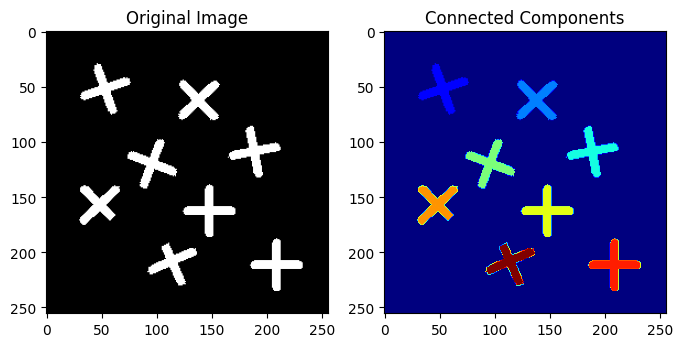

In [ ]:

# compare the number of connected components
print("Number of connected components using our function: ", len(cc))
print("Number of connected components using bwconncomp: ", labels.max())

# visualize the connected components
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(binary, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(labels, cmap='jet')
axs[1].set_title('Connected Components')
plt.show()


## Showing all the components


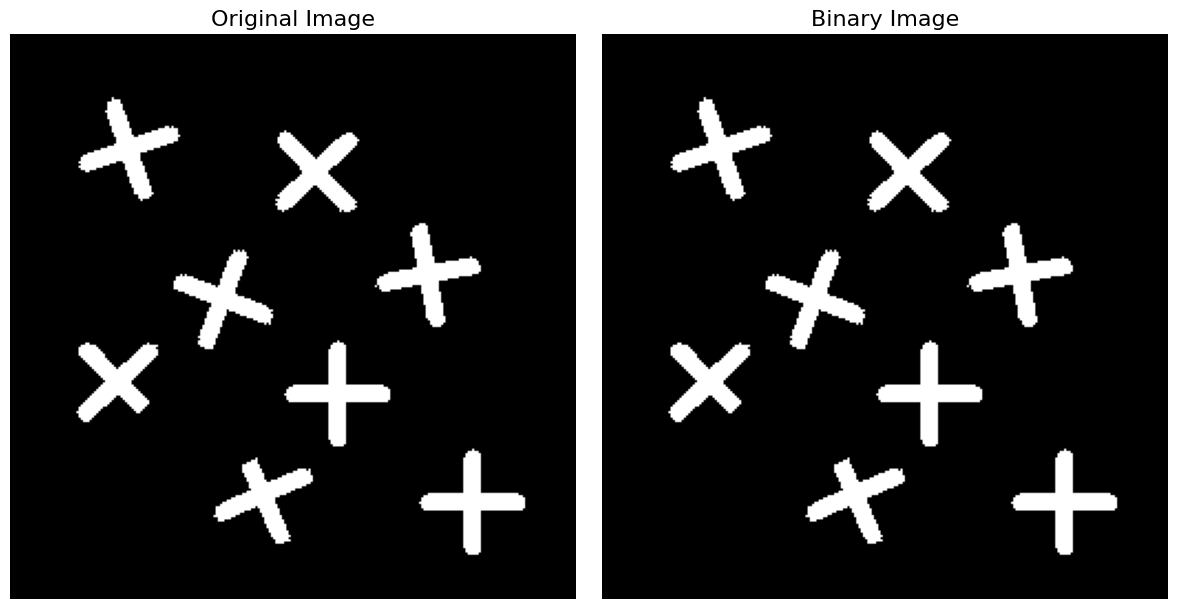

Number of connected components using our function:  8
Number of connected components using bwconncomp:  8


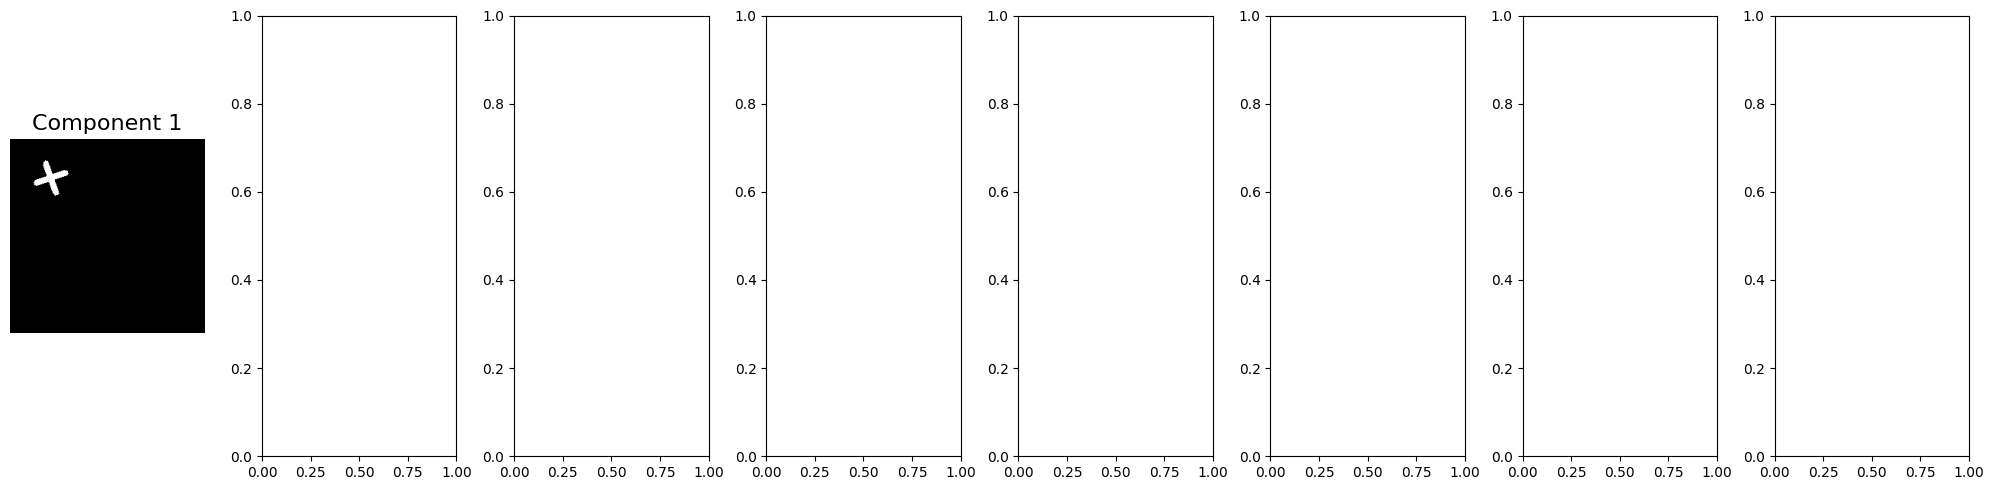

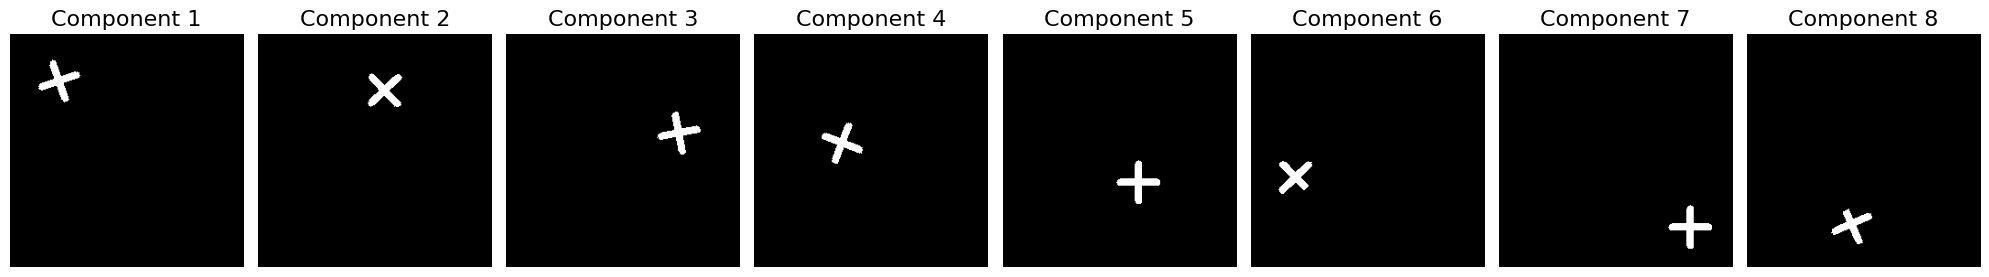

<Figure size 640x480 with 0 Axes>

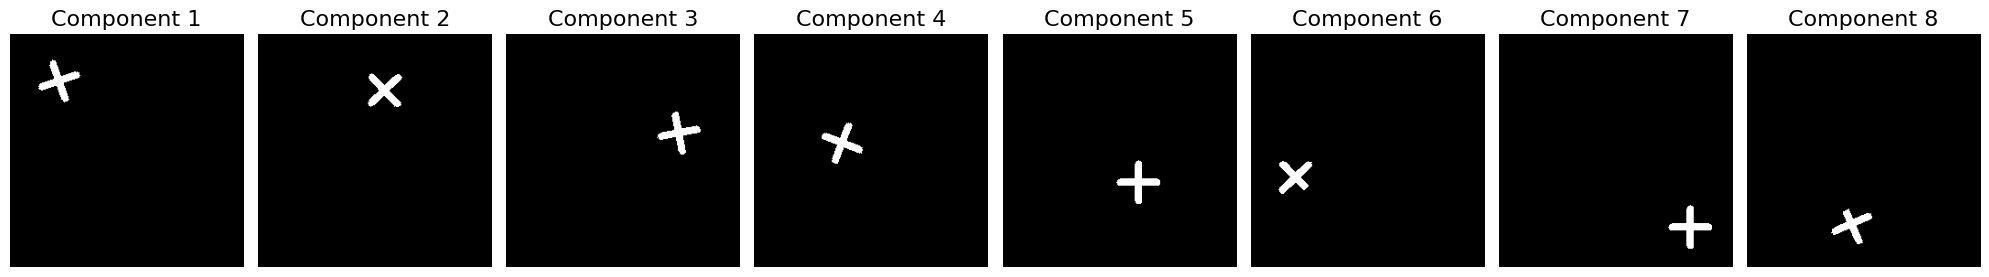

<Figure size 640x480 with 0 Axes>

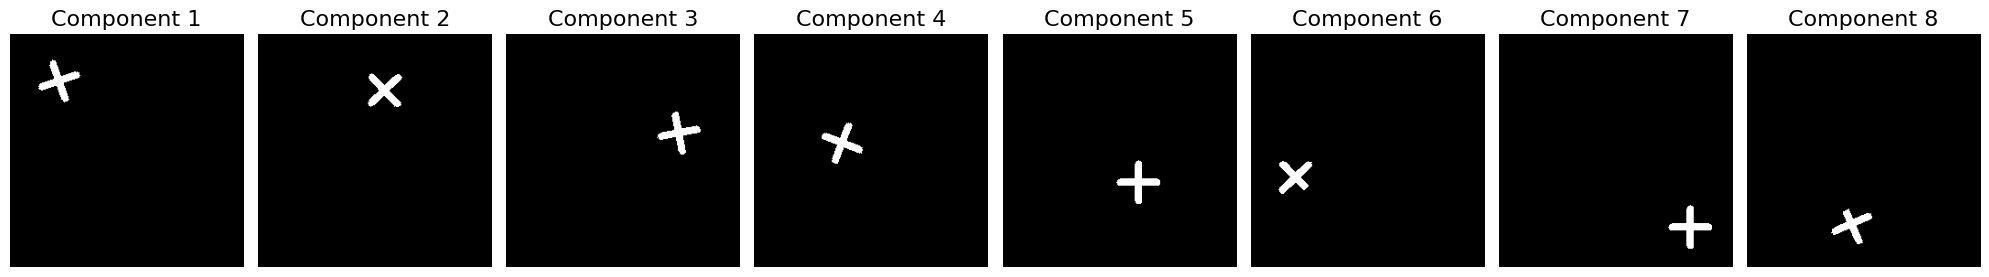

<Figure size 640x480 with 0 Axes>

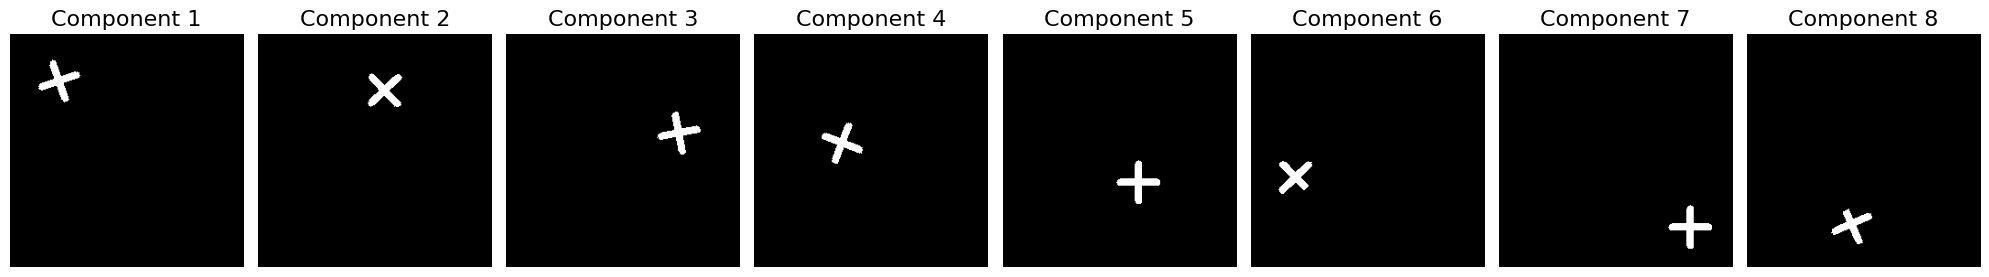

<Figure size 640x480 with 0 Axes>

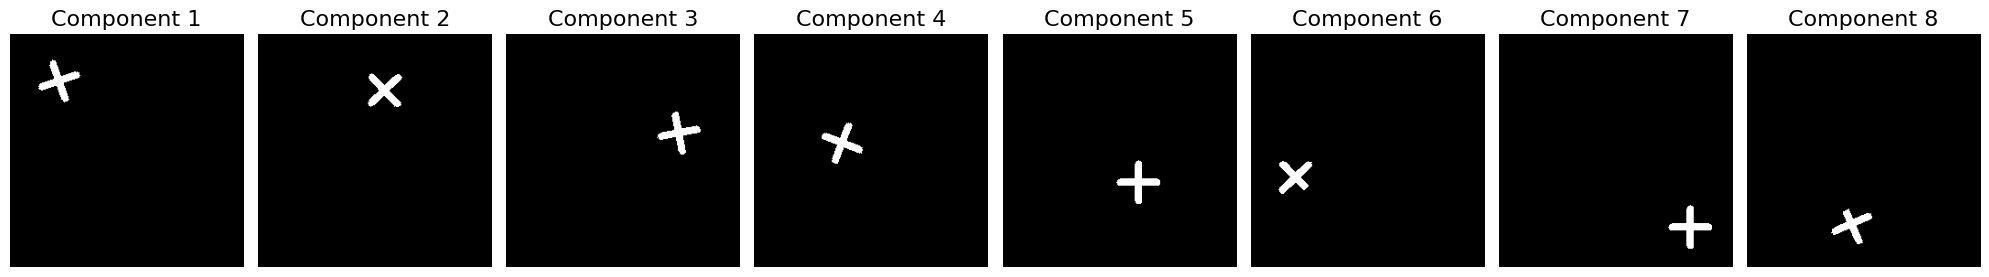

<Figure size 640x480 with 0 Axes>

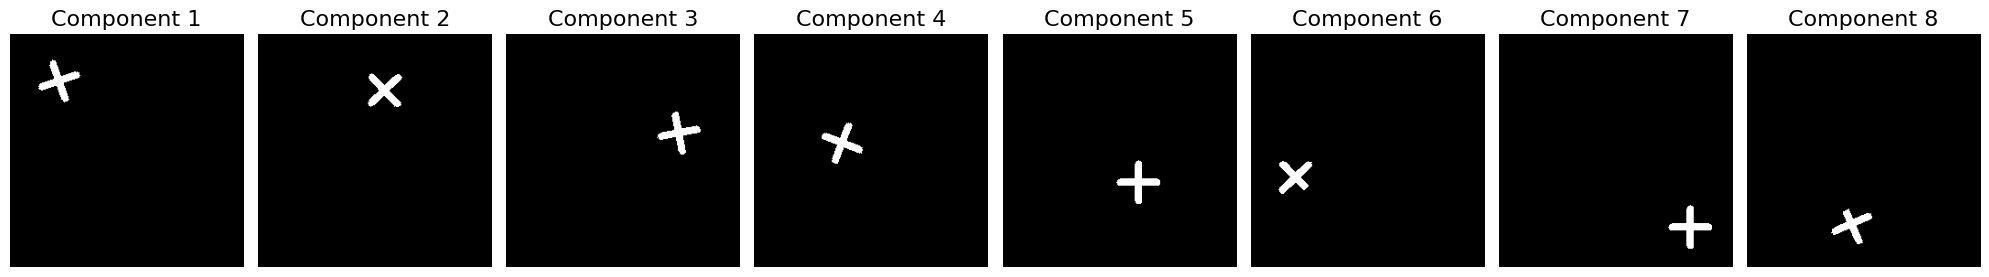

<Figure size 640x480 with 0 Axes>

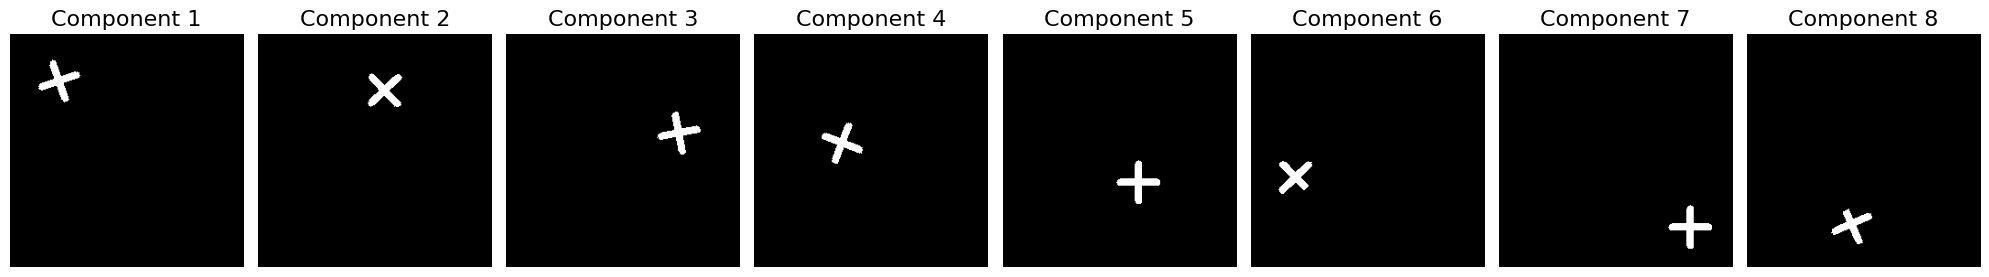

<Figure size 640x480 with 0 Axes>

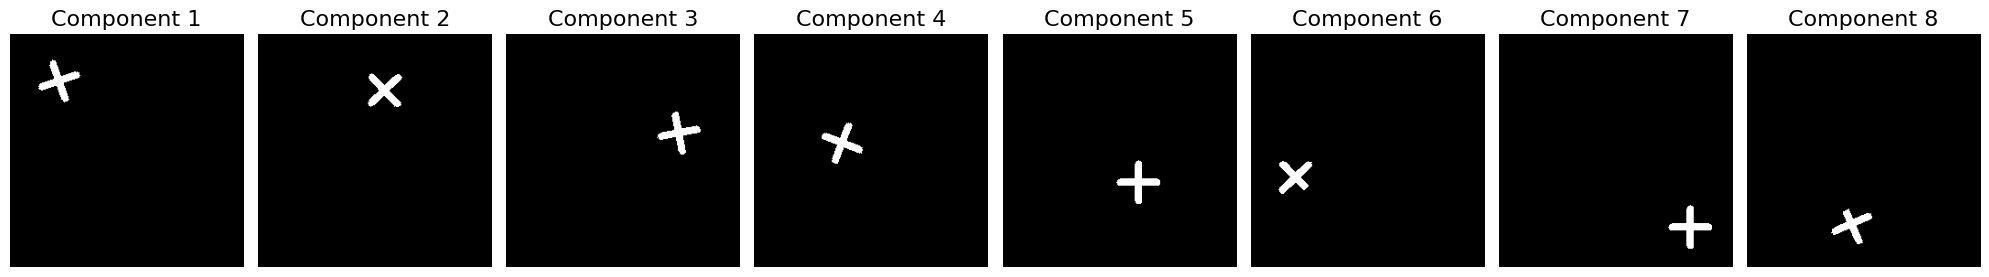

In [ ]:

img = cv2.imread("connected_com_test3.png", cv2.IMREAD_GRAYSCALE)

# convert the image to binary
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# define the set of intensity values to define connectivity
V = [255]

# show the original image and the binary image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image', fontsize=16)
axs[0].axis('off')
axs[1].imshow(binary, cmap='gray')
axs[1].set_title('Binary Image', fontsize=16)
axs[1].axis('off')
plt.tight_layout()
plt.show()

# find the connected components using our function
cc = Conncomp(binary, 8, V)

# find the connected components using bwconncomp
labels = label(binary, connectivity=2, background=0)

# compare the number of connected components
print("Number of connected components using our function: ", len(cc))
print("Number of connected components using bwconncomp: ", labels.max())

# visualize each connected component using our function
fig, axs = plt.subplots(1, len(cc), figsize=(20, 5))

for i, component in enumerate(cc):
    # create an empty image with the same shape as the original image
    img = np.zeros_like(binary)
    # set the pixels in the connected component to white
    for r, c in component:
        img[r, c] = 255
            # plot the connected component
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Component {i+1}', fontsize=16)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

    # visualize each connected component using bwconncomp
    regions = regionprops(labels)

    fig, axs = plt.subplots(1, len(regions), figsize=(20, 5))

    for i, region in enumerate(regions):
        # create an empty image with the same shape as the original image
        img = np.zeros_like(binary)
        # set the pixels in the connected component to white
        for r, c in region.coords:
            img[r, c] = 255

        # plot the connected component
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Component {i+1}', fontsize=16)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

